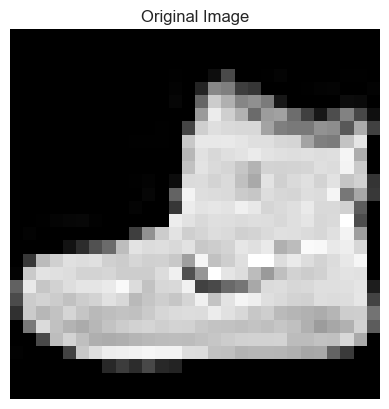

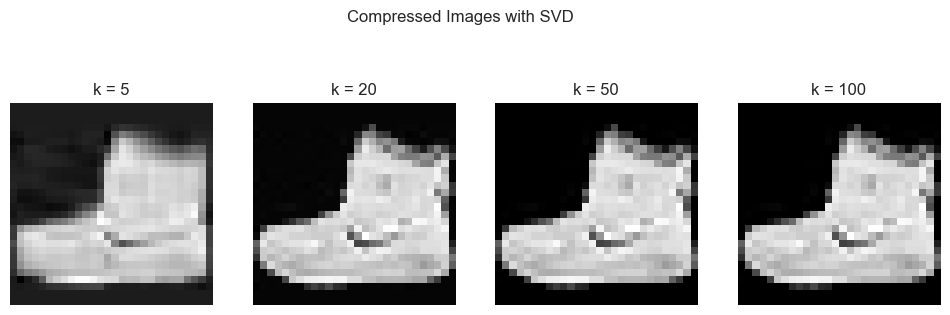

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion-MNIST dataset
# Load digits dataset from sklearn
(X_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

# Pick one image (e.g., the first one)
image = X_train[0]

# Display the original image
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Apply SVD
U, S, VT = np.linalg.svd(image, full_matrices=False)

# Compression function
def compress_image(U, S, VT, k):
    S_k = np.diag(S[:k])
    compressed = U[:, :k] @ S_k @ VT[:k, :]
    return compressed

# Plot compressed images for various values of k
ks = [5, 20, 50, 100]
plt.figure(figsize=(12, 4))
for i, k in enumerate(ks):
    compressed_image = compress_image(U, S, VT, k)
    plt.subplot(1, len(ks), i + 1)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f"k = {k}")
    plt.axis('off')
plt.suptitle("Compressed Images with SVD")
plt.show()


Even with only k = 5 (the 5 most important singular vectors), the image is still very distinct.